# Homework 7

In this assignment, you'll deploy your Python data science skills to perform a few analyses on the topics of equity and algorithmic bias. 

## Problem 1

In this problem, you will create a visualization of gender representation in artwork in the [Tate Art Museum](https://github.com/tategallery/collection).
Run the code block below to acquire and prepare the data. There's a lot of information that I've removed in the data preparation below, including the name of the artist, their birth and death dates, and various details about each piece. You may wish to explore the full data sets later, but for now, I thought you'd prefer to be able to focus on only the columns needed for today. 

In [28]:
import pandas as pd
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork.to_csv("artwork.csv", index = False)
artists.to_csv("artists.csv", index = False)

In [29]:
import pandas as pd
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork["id"] = artwork["artistId"]
artwork = artwork[["id", "year", "acquisitionYear", "title", "medium"]]
artists = artists[["id", "gender"]]
df = pd.merge(artwork, artists)

def dimension(med_string):
    """
    Assign a dimension to a given piece of artwork based on the description
    of the medium, supplied as a string. 
    Media that include the words "paper", "canvas", "oil", or "paint" are assumed 
    2D. 
    Media that are not 2d and include the words "bronze", "stone", or "ceramic" are 
    assumed 3D. 
    Otherwise, the media is "Other/Unknown"
    
    @param med_string: str, the original medium
    @return dim: one of "2D", "3D", or "Other/Unknown" according to the rules above. 
    """
    if type(med_string) != str:
        med_string = str(med_string)
    med_string = med_string.lower()
    if any([w in med_string for w in ["paper", "canvas", "oil", "paint"]]):
        return "2D"
    elif any([w in med_string for w in ["bronze", "stone", "ceramic"]]):
        return "3D"
    else:
        return "Other/Unknown"

df["dimension"] = [dimension(m) for m in df["medium"]]
df = df[["title","acquisitionYear", "gender", "dimension"]]

- The `title` column gives the title of each piece. 
- The `acquisitionYear` states the year in which the artwork was acquired by the Tate. 
- The `gender` column gives the gender of the artist. 
- The `dimension` column states whether the piece is two-dimensional (like a drawing or a painting) or three-dimensional (like a sculpture or ceramic). This is determined from a more thorough description of the medium using the simple `dimension()` function from above, although a more careful classification might be beneficial. A number of pieces have "Other/Unknown" in this column. 

In [30]:
# use this block to inspect the data if you'd like
df

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,Male,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,Male,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,Male,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,Male,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,Male,2D
...,...,...,...,...
69190,Venus Mound (from Tampax Romana),2013.0,Male,Other/Unknown
69191,It’s That Time Of The Month (from Tampax Romana),2013.0,Male,Other/Unknown
69192,Larvae (from Tampax Romana),2013.0,Male,Other/Unknown
69193,Living Womb (from Tampax Romana),2013.0,Male,2D


In [35]:
recode = {
    "Male":0,
    "Female":1
}

df['gender'] = df['gender'].map(recode)
df.head()

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,0.0,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,0.0,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,0.0,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,0.0,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,0.0,2D


In [ ]:
def plotter(df):
    # Plot total to date proportion of female artworks in the Tate
    

In [ ]:
df.groupby('dimension').apply(plotter)

In [37]:
sub_df = df[df['dimension'] == '2D']
sub_df.head()

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,0.0,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,0.0,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,0.0,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,0.0,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,0.0,2D


In [53]:
new_df = sub_df.groupby('acquisitionYear')['gender'].aggregate([sum, len])

new_df['cum_female'] = np.cumsum(new_df['sum'])
new_df['cum_total'] = np.cumsum(new_df['len'])
new_df['cum_ratio'] = new_df['cum_female']/new_df['cum_total']

In [54]:
new_df = new_df.reset_index()

In [56]:
new_df.head(n=10)

,acquisitionYear,sum,len,cum_female,cum_total,cum_ratio
0,1823.0,0.0,1.0,0.0,1.0,0.0
1,1824.0,0.0,2.0,0.0,3.0,0.0
2,1826.0,0.0,4.0,0.0,7.0,0.0
3,1827.0,0.0,1.0,0.0,8.0,0.0
4,1828.0,0.0,3.0,0.0,11.0,0.0
5,1830.0,0.0,2.0,0.0,13.0,0.0
6,1834.0,0.0,1.0,0.0,14.0,0.0
7,1835.0,0.0,1.0,0.0,15.0,0.0
8,1836.0,0.0,3.0,0.0,18.0,0.0
9,1837.0,0.0,4.0,0.0,22.0,0.0


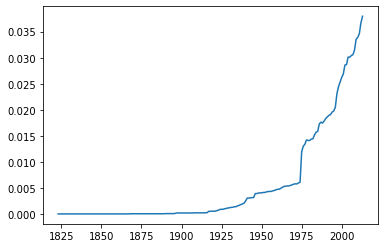

In [57]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1)

ax.plot(new_df['acquisitionYear'], new_df['cum_ratio'])


#### What You Should Do

Create a plot to answer the following question: 

> How has the amount of artwork **by female artists** increased with time, as a fraction of all artwork owned by the Tate? Are women better represented in the Tate through certain forms of artistic expression than others? 

To answer this question, create the following plot: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/art-output.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

The vertical axis is the percentage of all artwork created by female artists which was acquired on or before the stated date. You may assume that artwork, once acquired, remains permanently with the Tate (i.e. it is not lost or sold).  

### Specs

- There are multiple good approaches. A solution using a `for`- or `while`-loop can receive partial credit. For full credit, no explicit loops! 
- It is not necessary for your output to exactly match mine -- feel free to change colors, modify the labels, etc. However, you should ensure that you include axis labels and the legend. 
- Comments and docstrings are not necessary in this problem. 
- You are free to use any Python tools you find helpful in order to create this plot. 

#### "What if my plot looks different?"

Your final product should closely resemble the supplied example. You may make reasonable alternative choices that lead your plot to look slightly different in small details. You can receive full credit as long as your result looks quantitatively similar and has the same qualitative interpretation.


### Hints

- `np.cumsum()`. You'll need to appropriately sort `df` first in order to get a good result. 

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# Prepare a new data frame for task
df['Female'] = (df['gender'] != 'Male')
df['All'] = True
df = df[df['acquisitionYear'].notna()]
df = df.sort_values(by = 'acquisitionYear')
df

,title,acquisitionYear,gender,dimension,Female,All
44629,"Distant View of Maecenas’ Villa, Tivoli",1823.0,Male,2D,False,True
42092,The Village Holiday,1824.0,Male,2D,False,True
44717,The Painter and his Pug,1824.0,Male,2D,False,True
42091,The Blind Fiddler,1826.0,Male,2D,False,True
44831,Pylades and Orestes Brought as Victims before ...,1826.0,Male,2D,False,True
...,...,...,...,...,...,...
61293,Memory,2013.0,Male,2D,False,True
61292,Memory,2013.0,Male,2D,False,True
61291,Memory,2013.0,Male,2D,False,True
61300,Memory,2013.0,Male,2D,False,True


In [10]:
df['cum_ratio'] = np.cumsum(df['Female'])/np.cumsum(df['All'])
df

,title,acquisitionYear,gender,dimension,Female,All,cum_ratio
44629,"Distant View of Maecenas’ Villa, Tivoli",1823.0,Male,2D,False,True,0.000000
42092,The Village Holiday,1824.0,Male,2D,False,True,0.000000
44717,The Painter and his Pug,1824.0,Male,2D,False,True,0.000000
42091,The Blind Fiddler,1826.0,Male,2D,False,True,0.000000
44831,Pylades and Orestes Brought as Victims before ...,1826.0,Male,2D,False,True,0.000000
...,...,...,...,...,...,...,...
61293,Memory,2013.0,Male,2D,False,True,0.049417
61292,Memory,2013.0,Male,2D,False,True,0.049416
61291,Memory,2013.0,Male,2D,False,True,0.049416
61300,Memory,2013.0,Male,2D,False,True,0.049415


In [6]:
new = df.groupby(['dimension', 'acquisitionYear']).aggregate([sum, len])
new

title  \
                                                                             sum   
dimension     acquisitionYear                                                      
2D            1823.0                     Distant View of Maecenas’ Villa, Tivoli   
              1824.0                  The Village HolidayThe Painter and his Pug   
              1826.0           The Blind FiddlerPylades and Orestes Brought a...   
              1827.0           Cleombrotus Ordered into Banishment by Leonida...   
              1828.0           The Last SupperLandscape, with Jacques and the...   
...                                                                          ...   
Other/Unknown 2009.0           La Brea/Art Tips/Rat Spit/Tar PitsFilm Script ...   
              2010.0           Beirut CaoutchoucMonument for the LivingLiving...   
              2011.0           confessSuspended FallUntitledStarSweet ToothSo...   
              2012.0           Temporary DwellingsYOUNG-HAE CHANG HEAVY INDUS...   
              2013.0           Creature-Maquette (320)Venus Mound (from Tampa...   

                                  Female     All      
                              len    sum len sum len  
dimension     acquisitionYear                         
2D            1823.0            1      0   1   1   1  
              1824.0            2      0   2   2   2  
              1826.0            4      0   4   4   4  
              1827.0            1      0   1   1   1  
              1828.0            3      0   3   3   3  
...                            ..    ...  ..  ..  ..  
Other/Unknown 2009.0           99     23  99  99  99  
              2010.0           45     12  45  45  45  
              2011.0           38     14  38  38  38  
              2012.0           52     15  52  52  52  
              2013.0           55     14  55  55  55  

[402 rows x 6 columns]

In [158]:
new2 = (new.loc["2D"]).reset_index()
new2[0:20]

acquisitionYear                                              title         \
                                                                  sum    len   
0           1823.0            Distant View of Maecenas’ Villa, Tivoli      1   
1           1824.0         The Village HolidayThe Painter and his Pug      2   
2           1826.0  The Blind FiddlerPylades and Orestes Brought a...      4   
3           1827.0  Cleombrotus Ordered into Banishment by Leonida...      1   
4           1828.0  The Last SupperLandscape, with Jacques and the...      3   
5           1830.0  The Holy Family with the Infant St JohnThe Col...      2   
6           1834.0    Portrait of a Lady in the Character of Cressida      1   
7           1835.0                                   Joseph Nollekens      1   
8           1836.0  Lord LigonierJohn Philip Kemble as HamletBenja...      3   
9           1837.0  Miss Laura Dorothea Ross (Mrs Francis Robertso...      4   
10          1840.0            Ariel on a Bat’s BackManto and Tiresias      2   
11          1841.0  Sir Calepine Rescuing SerenaA Child’s Portrait...      2   
12          1842.0                             Sir David Wilkie, R.A.      1   
13          1843.0                                        Mrs Siddons      1   
14          1847.0  The Dogano, San Giorgio, Citella, from the Ste...    145   
15          1849.0                      William Woollett the Engraver      1   
16          1853.0  Benjamin West, P.R.A.William PittThomas Daniel...      3   
17          1854.0  View near the Loggerheads, DenbighThe Parish B...     17   
18          1855.0                  Valley with a Bridge over a River      1   
19          1856.0  On the Seine, near Jumièges[title not known][t...  31525   

   Female           All         
      sum    len    sum    len  
0       0      1      1      1  
1       0      2      2      2  
2       0      4      4      4  
3       0      1      1      1  
4       0      3      3      3  
5       0      2      2      2  
6       0      1      1      1  
7       0      1      1      1  
8       0      3      3      3  
9       0      4      4      4  
10      0      2      2      2  
11      0      2      2      2  
12      0      1      1      1  
13      0      1      1      1  
14      0    145    145    145  
15      0      1      1      1  
16      0      3      3      3  
17      3     17     17     17  
18      0      1      1      1  
19     10  31525  31525  31525

In [7]:
def female_rep(df):
    by_year = df.groupby("acquisitionYear")["Female"].aggregate([sum, len]).reset_index()
    ax.plot(by_year['acquisitionYear'],np.cumsum(by_year['sum'])/np.cumsum(by_year['len']), label=df['dimension'])

""


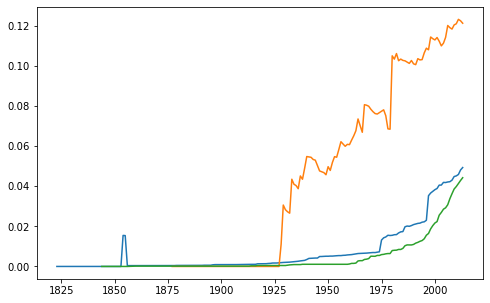

In [8]:
# your solution here
fig, ax = plt.subplots(1,1, figsize = (8, 5))
df.groupby(['dimension']).apply(female_rep)

## Problem 2

This problem is based on the article 

> Obermeyer, Z., Powers, B., Vogeli, C., & Mullainathan, S. (2019). Dissecting racial bias in an algorithm used to manage the health of populations. *Science*, 366(6464), 447-453.

In this article, the authors use patient medical records, demographics, and insurance claims to study bias in a machine learning model used to predict patient risk. This model has been used to make recommendations about which patients should be admitted to more intensive care programs on the basis of their health. 

In this problem, you will replicate several of the qualitative findings from this study. 

The results presented in this article were discussed by Dr. Ruha Benjamin in the video "[Are We Automating Racism](https://www.youtube.com/watch?v=Ok5sKLXqynQ)," which was one of the videos we watched as part of our discussion of algorithmic bias in Week 8. You are free to consult either the article or the video when completing this assignment. While doing so may be interesting, it is not likely to concretely help you in the problems below.




## Data Access

In order to protect patient privacy, the authors did not share the "real" data used in their study. Instead, they created a randomized version of the data that preserves many of the same patterns and trends. Run the cell below to access the data. I have also uploaded the CSV file directly to CCLE in case you have issues using this URL. 

In [12]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

There are 48,784 patients represented as rows in the data, and 160 pieces of information about each patient represented as columns. Run the code below to check this: 

In [13]:
df.shape

(48784, 160)

A few of the columns are going to be especially important in our analysis: 

- `risk_score_t` is the algorithm's risk score assigned to a given patient. 
- `cost_t` is the patient's medical costs in the study period. 
- `race` is the patient's self-reported race. The authors filtered the data to include only `white` and `black` patients. 
- `gagne_sum_t` is the total number of chronic illnesses presented by the patient during the study period. 
- `dem_female` is a patient sex indicator, with `1` indicating female patients and `0` indicating male patients. 

Run the code below to take a look at these columns. 

In [14]:
cols = ['risk_score_t', 'cost_t', 'gagne_sum_t','race',  'dem_female']
df[cols].head()

,risk_score_t,cost_t,gagne_sum_t,race,dem_female
0,1.987430,1200.0,0,white,0
1,7.677934,2600.0,3,white,1
2,0.407678,500.0,0,white,1
3,0.798369,1300.0,0,white,1
4,17.513165,1100.0,1,white,1


## Part A

Here's how the algorithm was used in the medical setting: 

> Patients with higher scores from the algorithm were more likely to be enrolled in “high-risk care management” programs. 

A high-risk care management program offers additional health resources to patients, including trained healthcare providers to help them manage complex health needs. In other words, 

> If you are very sick, getting a **high** score on the algorithm can help you receive **more** medical attention. 

One of the major findings of the study above was that the algorithm tended to give lower scores to Black patients, even when those Black patients were equally sick as White patients. In this part, you will replicate this finding. 

**To do so, create the following plot:** 

<figure class="image" style="width:70%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/risk1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

#### Key Points

- **The vertical axis gives the *percentile risk* of patients assigned by the algorithm, rounded to the nearest percentage point**. A patient in the 85th percentile, for example, received a risk score from the algorithm higher than 84% of all patients and lower than 15% of all patients. The raw risk score (not the percentile) of each patient is contained in the `risk_score_t` column. 
- **The horizontal axis gives the average number of chronic illnesses presented by patients in the corresponding risk percentile**. For example, White men in the 80th risk score percentile presented, on average, approximately two chronic illnesses. The number of chronic illnesses presented by a patient is contained in the `"gagne_sum_t"` column of the data. 
- Different colors segment Black and White patients (`race`). Two panels distinguish between male and female patients. The `dem_female` column gives the sex of each patient, with `0` representing male and `1` representing female.  

### Specs

Please attend to the following details:

- It is important that you **round the percentile risk scores to the nearest percentile**, and compute the average number of conditions within each rounded percentile. This means that, for example, there should be 101 data points  (percentiles 0%-100%) corresponding to Black women, 101 other data points corresponding to White women, etc. Failure to round and compute the mean will result in your plot containing an unreadable number of points. 
- The horizontal axis, vertical axis, and axis titles are all appropriately ***capitalized***: the first letter of the first word is capitalized. 
- The legend title, as well as the legend entries, are also appropriately capitalized. 
- Beyond these specs, you are free to modify the colors, transparency, etc, and get creative with the text. You are not required to replicate the exact size or aspect ratio of the figure. 

### Hints

- The only columns you need to work with in this problem are: `risk_score_t`, `race`, `gagne_sum_t` (containing the number of chronic illnesses per patient), and `dem_female`
- The plotting aspect problem can be solved using either standard `matplotlib` or `seaborn`. Correct approaches using either set of tools will receive full credit. 
- The percentiles of an data frame column `df["x"]` can be computed by `df["x"].rank()/len(df)`. The results will be values between 0 and 1. One should then multiply by 100 and `round()` the results to obtain the percentiles as integers between 0 and 100. 
- To compute the mean number of chronic illnesses per percentile, group by the integer percentiles (as well as race and sex) and then compute the `mean` of the `gagne_sum_t` column. 
- The plotted points should correspond to *average* number of chronic conditions, *grouped by* percentiles and demographic variables. 

In [20]:
# feel free to use this cell for "scratchwork" (e.g. data exploration). 
# Place your actual solution in the cell below
df['rank'] = (100*(df['risk_score_t'].rank())/len(df)).round()
df.head()


,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t,rank
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,35.0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,1,0,0,1,0,0,1,4,3,86.0
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,4.0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,11.0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,1,1,98.0


In [22]:
# your solution
df.groupby('rank')['gagne_sum_t'].mean()

rank
0.0      0.029520
1.0      0.111111
2.0      0.163462
3.0      0.095070
4.0      0.110236
           ...   
96.0     4.148980
97.0     4.776181
98.0     4.827869
99.0     5.448770
100.0    7.196721
Name: gagne_sum_t, Length: 101, dtype: float64

## Part B

In no more than four sentences, describe the meaning of the plot you produced in Part A. For example, suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program? 

\[**Your discussion here**\]


## Part C

Next, you'll perform an analysis to identify the source of this disparity in Black and White patients. You might imagine that the model was trained to base its risk scores on an "overall level of health" in the training data. However, it is very difficult to get data on such a concept. 

For this reason, the algorithm studied was trained instead using *total medical costs* as the target variable. That is: 

> The risk score an agent receives is a function of the model's prediction of the total medical costs which will be incurred by that individual. 

This is a superficially logical choice, since (a) total medical costs are generally correlated with health and (b) costs are regularly recorded in insurance claims data. 

In this problem, you'll use linear regression to estimate the difference in generated medical costs between White and Black patients in this data set, and comment on this result in the context of Part A and B. 

### What You Should Do

1. If you modified the data frame `df` in any way, you should re-run the code in which you load the data frame. 
2. Run the supplied cell in order to limit the columns in the data frame to the ones you will use in this analysis. 
3. The `race` column of the data is currently a string. Encode it using integer labels. 
4. Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 
5. Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. **Important**: you should do this using only one function call. 
6. Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
    - Training score: `0.12629789734544883`
    - Testing score: `0.12415443228313183`
7. Based these results, comment on whether you are concerned about overfitting. **Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 
8. Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
    - Coefficient of `race`: `579.9031747777375`. 
9. Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
    - State your estimate of the difference in medical costs between White and Black patients. 
    - Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 
    
    
***Note***: *The estimated cost disparity in the published paper is higher, over twice the result given here. This may reflect a methodological difference in their modeling or possibly be a byproduct of their data randomization.* 

#### Step 1

If you modified the data frame `df` in any way in Part A, you should run the code below to reload the data frame. 

In [ ]:
# Step 1: run, do not modify
df = pd.read_csv(url)

#### Step 2

Run this cell in order to limit the columns in the data frame to the ones you will use in this analysis. 

In [ ]:
# Step 2: run, do not modify
cols = ['cost_t',
        'race',
        'dem_female',
        'dem_age_band_18-24_tm1',
        'dem_age_band_25-34_tm1',
        'dem_age_band_35-44_tm1',
        'dem_age_band_45-54_tm1',
        'dem_age_band_55-64_tm1',
        'dem_age_band_65-74_tm1',
        'dem_age_band_75+_tm1',
        'alcohol_elixhauser_tm1',
        'anemia_elixhauser_tm1',
        'arrhythmia_elixhauser_tm1',
        'arthritis_elixhauser_tm1',
        'bloodlossanemia_elixhauser_tm1',
        'coagulopathy_elixhauser_tm1',
        'compdiabetes_elixhauser_tm1',
        'depression_elixhauser_tm1',
        'drugabuse_elixhauser_tm1',
        'electrolytes_elixhauser_tm1',
        'hypertension_elixhauser_tm1',
        'hypothyroid_elixhauser_tm1',
        'liver_elixhauser_tm1',
        'neurodegen_elixhauser_tm1',
        'obesity_elixhauser_tm1',
        'paralysis_elixhauser_tm1',
        'psychosis_elixhauser_tm1',
        'pulmcirc_elixhauser_tm1',
        'pvd_elixhauser_tm1',
        'renal_elixhauser_tm1',
        'uncompdiabetes_elixhauser_tm1',
        'valvulardz_elixhauser_tm1',
        'wtloss_elixhauser_tm1',
        'cerebrovasculardz_romano_tm1',
        'chf_romano_tm1',
        'dementia_romano_tm1',
        'hemiplegia_romano_tm1',
        'hivaids_romano_tm1',
        'metastatic_romano_tm1',
        'myocardialinfarct_romano_tm1',
        'pulmonarydz_romano_tm1',
        'tumor_romano_tm1',
        'ulcer_romano_tm1']

df = df[cols]

#### Step 3

The `race` column of the data is currently a string. Encode it using integer labels. 

In [ ]:
# Step 3: your code here


#### Step 4

Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 

In [ ]:
# Step 4: your code here


#### Step 5

Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. 

**Important**: you should do this using only one function call. 


In [ ]:
# Step 5: your code here


#### Step 6

Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
- Training score: `0.12629789734544883`
- Testing score: `0.12415443228313183`

In [ ]:
# Step 6: your code here


#### Step 7

Based the results above, comment on whether you are concerned about overfitting. 

**Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 

\[**Your comment on overfitting here!**\]

#### Step 8

Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the predictor data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
- Coefficient of `race`: `579.9031747777375`. 

In [ ]:
# Step 8: your code here


#### Step 9

Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
- State your estimate of the difference in medical costs between White and Black patients. 
- Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 

\[**your discussion of your results here!**\]